In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [ ]:
# 파일 경로
file_path = '../3. 군구_시간대, 연령대, 요일_음주운전_합계/군구별_요일_음주운전_합계.csv'

# 데이터 로드
data = pd.read_csv(file_path, encoding='utf-8-sig', index_col=0)

In [ ]:
# 1. 데이터 준비: 군구별 합계를 특징으로 사용
features = data.copy()


In [ ]:
# 2. 데이터 표준화
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [ ]:

# 3. 엘보우 방법으로 최적의 클러스터 개수 결정
inertia = []
for k in range(1, 11):  # 클러스터 개수를 1~10까지 시도
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)


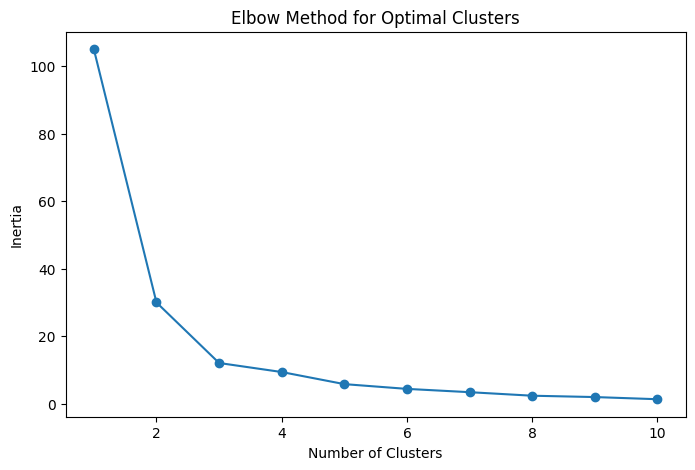

In [ ]:

# 엘보우 방법 시각화
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [ ]:

# 4. K-Means 클러스터링
optimal_k = 3  # 엘보우 방법 결과로 얻은 최적 클러스터 개수
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(features_scaled)


In [ ]:

# 5. 군집별 데이터 확인
print(data.groupby('Cluster').mean())


                월요일         화요일         수요일         목요일         금요일  \
Cluster                                                               
0        125.142857  137.428571  158.571429  146.285714  168.857143   
1         51.000000   54.000000   58.500000   59.500000   67.000000   
2        183.500000  201.250000  194.750000  221.000000  227.000000   

                토요일     일요일  
Cluster                      
0        201.142857  172.00  
1         87.750000   70.75  
2        269.500000  234.50  


In [ ]:
# 군집별로 군구 확인
for cluster in range(optimal_k):  # optimal_k는 군집 수
    print(f"Cluster {cluster}에 포함된 군구:")
    print(data[data['Cluster'] == cluster].index.tolist())
    print("\n")


Cluster 0에 포함된 군구:
['강서구', '금정구', '동래구', '북구', '사상구', '사하구', '연제구']


Cluster 1에 포함된 군구:
['동구', '서구', '영도구', '중구']


Cluster 2에 포함된 군구:
['기장군', '남구', '부산진구', '해운대구']




## 군집 분석 결과 해석

출력된 결과는 각 요일에 대한 평균 음주운전 건수입니다. 각 클러스터는 해당 요일별 평균 음주운전 건수가 유사한 군구들로 구성됩니다.

## 클러스터별 특징 해석

- Cluster 0:
중간 수준의 음주운전 건수를 가진 군구.
금요일(168.86)과 토요일(201.14)에 높은 건수를 보임.
주중에는 평균적인 음주운전 건수를 기록.

- Cluster 1:
음주운전 건수가 가장 낮은 군구.
모든 요일에서 음주운전 건수가 낮으며, 특히 **일요일(10.75)**에 매우 낮은 값을 보임.
음주운전 문제가 덜 심각한 지역.

- Cluster 2:
음주운전 건수가 가장 높은 군구.
모든 요일에서 높은 음주운전 건수를 기록하며, 특히 **금요일(227.00)**과 **토요일(269.50)**에 가장 높은 값을 보임.
음주운전 문제가 심각한 지역.

## 군집 분석 활용 방안
Cluster 1 (낮은 음주운전 군구):

음주운전 예방 캠페인의 필요성이 낮은 지역.
안전 운전 관련 정책을 유지.

Cluster 0 (중간 수준 군구):

금요일과 토요일에 음주운전이 증가하는 경향이 있음.
주말 중심의 음주운전 단속 강화 필요.

Cluster 2 (높은 음주운전 군구):

주중 및 주말 모두 음주운전 건수가 높음.
전반적인 음주운전 단속과 예방 캠페인 집중 지역.
금요일과 토요일에 단속을 강화하고, 심야 시간대 감시를 늘릴 필요.


In [ ]:
# 6. 결과 저장
output_path = '요일별_부산군구_군집분석결과.csv'
data.to_csv(output_path, encoding='utf-8-sig')

NameError: name 'data' is not defined